In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import glob as gb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras .layers import Dense,Activation,MaxPooling2D,Conv2D,Flatten,Dropout,BatchNormalization

In [ ]:
trainPath=r"/content/drive/MyDrive/C-NMC_Leukemia/training_data"

In [ ]:
for folder in  os.listdir(trainPath ) :
    trainFolder=  r"/content/drive/MyDrive/C-NMC_Leukemia/training_data"+'/'+folder
    for f in os.listdir(trainFolder):
        files = gb.glob(pathname= str( trainFolder +'/' + f +'/*.bmp'))
        print(f'For training data , found {len(files)} in folder {f}')

For training data , found 2397 in folder all
For training data , found 1130 in folder hem
For training data , found 2418 in folder all
For training data , found 1163 in folder hem
For training data , found 2457 in folder all
For training data , found 1096 in folder hem


In [ ]:
All=[]
Hem=[]
for folder in  os.listdir(trainPath ) :
    trainFolder=  r"/content/drive/MyDrive/C-NMC_Leukemia/training_data"+'/'+folder
    for f in os.listdir(trainFolder ):
        files = gb.glob(pathname= str( trainFolder +'/' + f +'/*.bmp'))

        if (f=='all'):
            All.extend(files);
        else:

            Hem.extend(files)
All = np.array(All)
Hem = np.array(Hem)

print(len(All))
print(len(Hem))

7272
3389


In [ ]:
Image = []
Label = []

for i in range(0, int(len(All) / 2)):
    img = cv2.imread(All[i])
    img = cv2.resize(img, (128,128))
    Image.append(img)
    Label.append(1)

for i in range(0, int(len(Hem) / 2)):
    img = cv2.imread(Hem[i])
    img =cv2. resize(img, (128,128))
    Image.append(img)
    Label.append(0)

Image = np.array(Image)
Label = np.array(Label)

Image.shape, Label.shape

((5330, 128, 128, 3), (5330,))

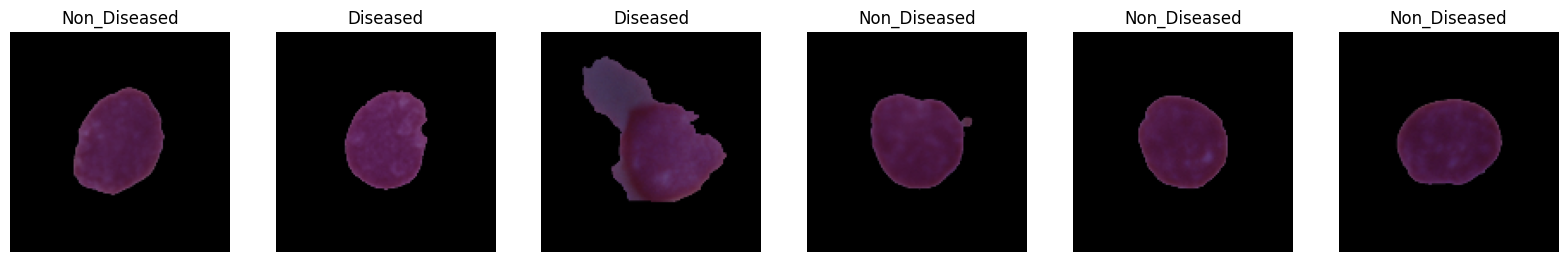

In [ ]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(Image),6))) :
    plt.subplot(6,6,n+1)
    plt.imshow(Image[i])
    plt.axis('off')
    if Label[i] == 1:
        plt.title('Diseased')
    else:
        plt.title('Non_Diseased')


In [ ]:
X_train=Image
y_train=Label

In [ ]:
valid_data = pd.read_csv('/content/drive/MyDrive/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

In [ ]:
valid_data.head()

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1


In [ ]:
valid_data.shape

(1867, 3)

In [ ]:
X_val = []

for image_name in valid_data['new_names']:
    # Loading images
    img = cv2.imread('../content/drive/MyDrive/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/' + image_name)
    # Resizing
    img =cv2. resize(img, (128,128))
    # Appending them into list
    X_val.append(img)

X_val = np.array(X_val)


y_val = valid_data.labels.values

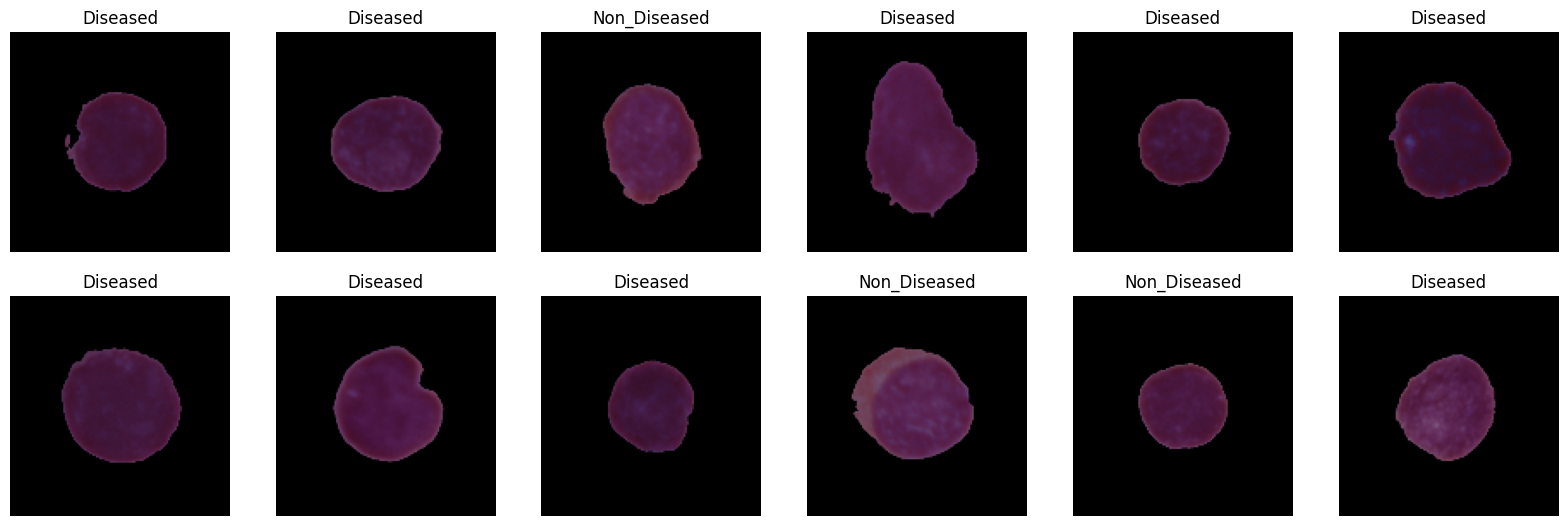

In [ ]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_val),12))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_val[i])
    plt.axis('off')
    if y_val[i] == 1:
        plt.title('Diseased')
    else:
        plt.title('Non_Diseased')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D())
Dropout(0.2)
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
Dropout(0.2)
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(32,activation ="relu"))
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(1, activation='sigmoid'))
Dropout(0.4)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


from keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            verbose=2,
                                            factor=0.5,
                                            min_lr=0.00001)
earlystop = EarlyStopping(patience=15)

In [ ]:
history = model.fit(X_train,y_train, batch_size=128,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 128
                              , callbacks=[earlystop,learning_rate_reduction])


Epoch 1/20
41/41 - 255s - loss: 0.7259 - accuracy: 0.7814 - val_loss: 0.6534 - val_accuracy: 0.6851 - lr: 0.0010 - 255s/epoch - 6s/step
Epoch 2/20
41/41 - 250s - loss: 0.4119 - accuracy: 0.8356 - val_loss: 0.7581 - val_accuracy: 0.6947 - lr: 0.0010 - 250s/epoch - 6s/step
Epoch 3/20
41/41 - 273s - loss: 0.3903 - accuracy: 0.8437 - val_loss: 0.7463 - val_accuracy: 0.6909 - lr: 0.0010 - 273s/epoch - 7s/step
Epoch 4/20
41/41 - 268s - loss: 0.3717 - accuracy: 0.8512 - val_loss: 0.7468 - val_accuracy: 0.6931 - lr: 0.0010 - 268s/epoch - 7s/step
Epoch 5/20
41/41 - 278s - loss: 0.3704 - accuracy: 0.8527 - val_loss: 0.7001 - val_accuracy: 0.6626 - lr: 0.0010 - 278s/epoch - 7s/step
Epoch 6/20
41/41 - 271s - loss: 0.3472 - accuracy: 0.8660 - val_loss: 0.7822 - val_accuracy: 0.6834 - lr: 0.0010 - 271s/epoch - 7s/step
Epoch 7/20
41/41 - 280s - loss: 0.3102 - accuracy: 0.8822 - val_loss: 0.8010 - val_accuracy: 0.6642 - lr: 0.0010 - 280s/epoch - 7s/step
Epoch 8/20
41/41 - 270s - loss: 0.2587 - accurac

In [ ]:
val_Loss, val_Accuracy = model.evaluate(X_val, y_val)

print('Test Loss is '+str(val_Loss))
print('Test Accuracy is '+str(val_Accuracy ))

59/59 [==============================] - 22s 370ms/step - loss: 2.2624 - accuracy: 0.6631
Test Loss is 2.262420177459717
Test Accuracy is 0.6630958914756775


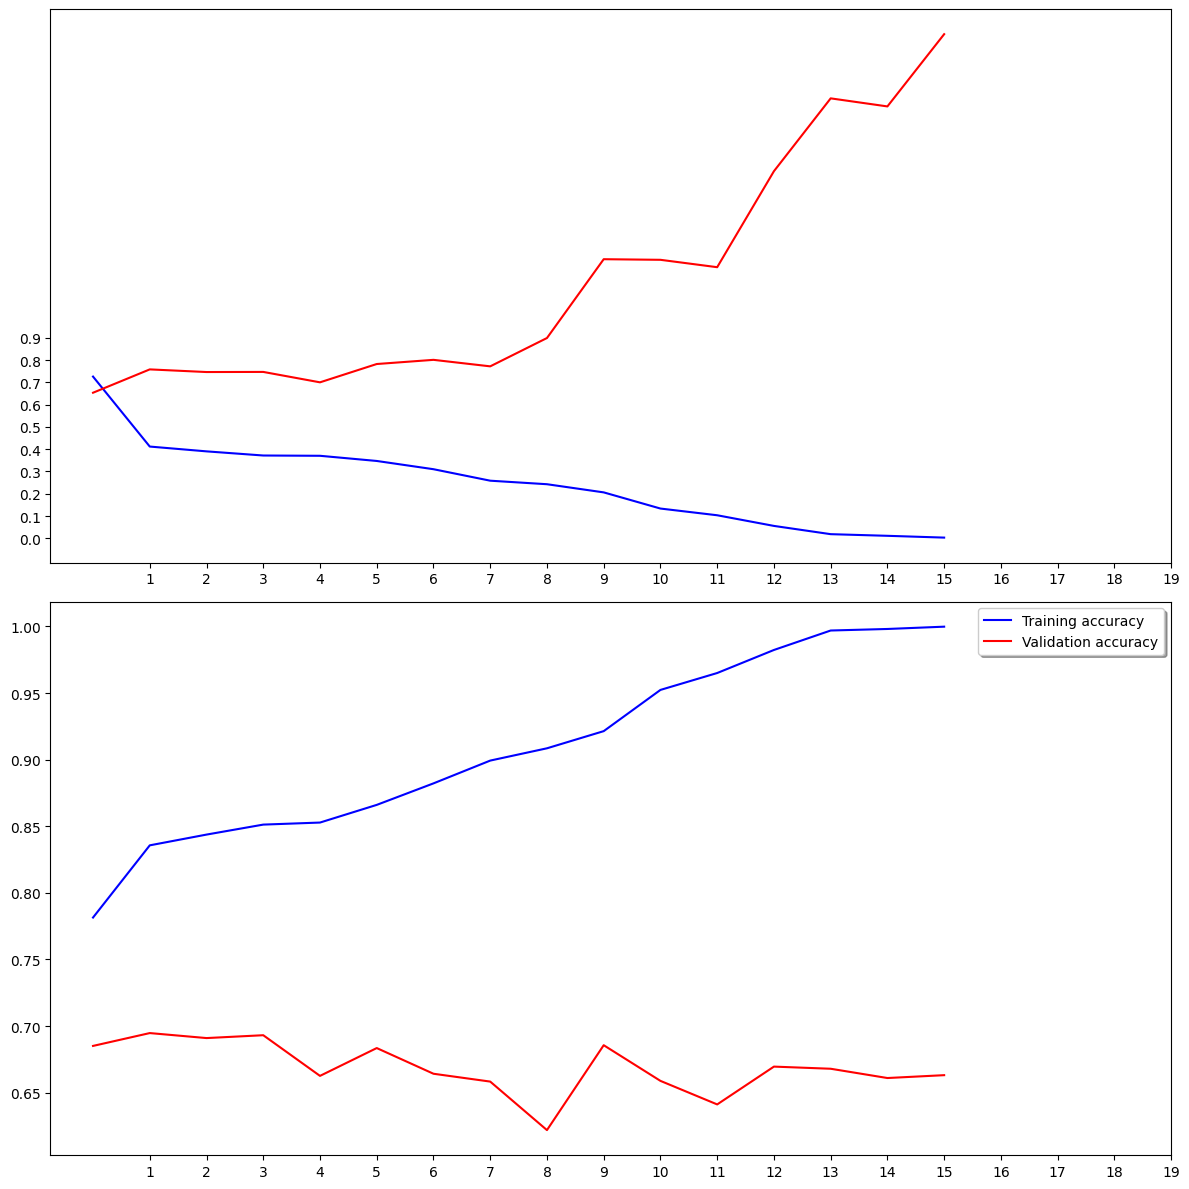

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


In [ ]:
print(type(X_test))
X_test = np.array(X_test)
# X_test = X_test / 2

<class 'numpy.ndarray'>


In [ ]:
y_pred=model.predict(X_test)
print('Prediction Shape is {}'.format(y_pred.shape))

81/81 [==============================] - 32s 392ms/step
Prediction Shape is (2586, 1)


VGG16

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# VGG16
from keras.applications.vgg16 import VGG16

# To show images
from PIL import Image

Create dataframes

In [ ]:
# Collect all data into one dataframe
def create_df(dataset):
    image_paths, labels = [], []

    for dirpath, dirnames, filenames in os.walk(dataset):
        filenames = filenames[:int(len(filenames) * 0.5)]
        for filename in filenames:

            image = os.path.join(dirpath, filename)
            image_paths.append(image)
            if dirpath[-3:] == 'all':
                labels.append('all')
            else:
                labels.append('hem')

    df = pd.DataFrame({'Image Path': image_paths,
                           'Label': labels})

    return df


train_dir = r"/content/drive/MyDrive/C-NMC_Leukemia/training_data"
df =  create_df(train_dir)

train_df, remaining_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=31, stratify=df['Label'])
valid_df, test_df= train_test_split(remaining_df, train_size=0.5, shuffle=True, random_state=31, stratify=remaining_df['Label'])

print("Number of training samples: %d" % len(train_df.index))
print("Number of test samples: %d" % len(test_df.index))
print("Number of validation samples: %d" % len(valid_df.index))

Number of training samples: 3730
Number of test samples: 800
Number of validation samples: 799


Display model performance

In [ ]:
def show_history_plot(history):

    training_accuracy = history['accuracy']
    epochs = range(1, len(training_accuracy) + 1)

    # Creating subplots for accuracy and loss
    plt.figure(figsize=(15, 5))

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    plt.plot(epochs, history['accuracy'], 'b', label='Training accuracy', marker='o')
    plt.plot(epochs, history['val_accuracy'], 'c', label='Validation accuracy', marker='o')
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    plt.plot(epochs, history['loss'], 'b', label='Training loss', marker='o')
    plt.plot(epochs, history['val_loss'], 'c', label='Validation loss', marker='o')
    plt.title('Training and Validation Loss', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Improve layout and displaying the plot
    plt.tight_layout()
    plt.show()

Confusion matrix

In [ ]:
def show_conf_matrix(model):
    test_gen.reset()  # Reset the generator to be sure it's at the start of the dataset
    y_pred = model.predict(test_gen, steps=test_gen.n // test_gen.batch_size+1, verbose=0)

    label_dict = test_gen.class_indices
    classes = list(label_dict.keys())

    # Convert predictions to labels
    pred_labels = np.argmax(y_pred, axis=1)
    y_true = test_gen.classes

    # Generate the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_true, pred_labels)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

    # Plot the confusion matrix
    cmap = plt.cm.Blues
    cm_display.plot(cmap=cmap, colorbar=False)

    plt.title('Confusion Matrix', fontsize=16)
    plt.figure(figsize=(7, 7))
    plt.show()

Evaluation matrix

In [ ]:
def evaluation_matrix(model):
    test_steps = len(test_df) // batch_size
    train_score = model.evaluate(train_gen, steps= test_steps, verbose= 0)
    valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 0)
    test_score = model.evaluate(test_gen, steps= test_steps, verbose= 0)

    header = "{:<12} {:<10} {:<10}".format("", "Loss", "Accuracy")
    separator = '-' * len(header)
    train_row = "{:<12} {:<10.5f} {:<10.5f}".format("Train", train_score[0], train_score[1])  # Formats the float to five decimal places
    valid_row = "{:<12} {:<10.5f} {:<10.5f}".format("Validation", valid_score[0], valid_score[1])
    test_row = "{:<12} {:<10.5f} {:<10.5f}".format("Test", test_score[0], test_score[1])

    table = '\n'.join([header, separator, train_row, valid_row, test_row])
    print(table)

Initializing image data generators

In [ ]:
batch_size = 100

train_data_generator = ImageDataGenerator(horizontal_flip=True)
valid_data_generator = ImageDataGenerator()

train_gen = train_data_generator.flow_from_dataframe( train_df, x_col= 'Image Path', y_col= 'Label', target_size= (224, 224), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = valid_data_generator.flow_from_dataframe( valid_df, x_col= 'Image Path', y_col= 'Label', target_size= (224, 224), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = valid_data_generator.flow_from_dataframe( test_df, x_col= 'Image Path', y_col= 'Label', target_size= (224, 224), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

train_steps = test_gen.n // test_gen.batch_size + 1
validation_steps = valid_gen.n // valid_gen.batch_size

Found 3730 validated image filenames belonging to 2 classes.
Found 799 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


VGG16 model

In [ ]:
# Instantiate base model
img_shape=(224, 224, 3)
VGG16_base_model = VGG16(weights='imagenet', input_shape=img_shape, include_top=False, pooling=None)

# Freeze base model to keep pre-trained weights
VGG16_base_model.trainable = False

# Add custom top layers for binary classification
last_layer = VGG16_base_model.get_layer('block5_pool')
last_output = last_layer.output
x = keras.layers.GlobalMaxPooling2D()(last_output)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(2, activation='sigmoid')(x)

# Create new model
VGG16_model = tf.keras.Model(VGG16_base_model.input, x, name="VGG16_model")

VGG16_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

VGG16_model.summary()

Model: "VGG16_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       

Train model

In [ ]:
epochs = 10
history_VGG16 = VGG16_model.fit(
    train_gen,
    steps_per_epoch=train_steps,
    validation_data=valid_gen,
    validation_steps=validation_steps,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
9/9 [==============================] - 937s 106s/step - loss: 7.8287 - accuracy: 0.5494 - val_loss: 3.4828 - val_accuracy: 0.5800
Epoch 2/10


UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7ba7a8136200>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 1064, in generator_fn
    yield x[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 423, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7ba7a8136200>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1845]

AlexNet

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import glob as gb

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
def AlexNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    # 1st Convolutional Layer
    x = Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='valid')(inputs)
    x = MaxPooling2D((3,3), strides=(2,2), padding='valid')(x)
    # 2nd Convolutional Layer
    x = Conv2D(256, (5,5), strides=(1,1), activation='relu', padding='same')(x)
    x = MaxPooling2D((3,3), strides=(2,2), padding='valid')(x)
    # 3rd Convolutional Layer
    x = Conv2D(384, (3,3), strides=(1,1), activation='relu', padding='same')(x)
    # 4th Convolutional Layer
    x = Conv2D(384, (3,3), strides=(1,1), activation='relu', padding='same')(x)
    # 5th Convolutional Layer
    x = Conv2D(256, (3,3), strides=(1,1), activation='relu', padding='same')(x)
    x = MaxPooling2D((3,3), strides=(2,2), padding='valid')(x)
    # Flatten the output of the previous layer
    x = Flatten()(x)
    # 1st Fully Connected Layer
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    # 2nd Fully Connected Layer
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    # Output layer with softmax activation
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model


In [ ]:
input_shape = (128, 128, 3)
num_classes = 2  # Number of classes (Diseased and Non-Diseased)
model = AlexNet(input_shape, num_classes)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
42/42 [==============================] - 14s 122ms/step - loss: 6.3233 - accuracy: 0.7225 - val_loss: 0.6257 - val_accuracy: 0.6845
Epoch 2/20
42/42 [==============================] - 2s 48ms/step - loss: 0.4180 - accuracy: 0.8278 - val_loss: 0.6649 - val_accuracy: 0.6776
Epoch 3/20
42/42 [==============================] - 2s 48ms/step - loss: 0.3962 - accuracy: 0.8377 - val_loss: 0.6453 - val_accuracy: 0.6743
Epoch 4/20
42/42 [==============================] - 2s 48ms/step - loss: 0.3825 - accuracy: 0.8463 - val_loss: 0.7578 - val_accuracy: 0.6888
Epoch 5/20
42/42 [==============================] - 2s 48ms/step - loss: 0.3709 - accuracy: 0.8542 - val_loss: 0.7008 - val_accuracy: 0.6824
Epoch 6/20
42/42 [==============================] - 2s 51ms/step - loss: 0.3508 - accuracy: 0.8638 - val_loss: 0.8711 - val_accuracy: 0.6792
Epoch 7/20
42/42 [==============================] - 2s 48ms/step - loss: 0.3223 - accuracy: 0.8709 - val_loss: 1.0365 - val_accuracy: 0.6856
Epoch 8/20


In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

59/59 [==============================] - 1s 11ms/step - loss: 2.7417 - accuracy: 0.6513
Validation Loss: 2.741663932800293
Validation Accuracy: 0.6513122916221619


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)


59/59 [==============================] - 0s 5ms/step
[[ 156  492]
 [ 159 1060]]


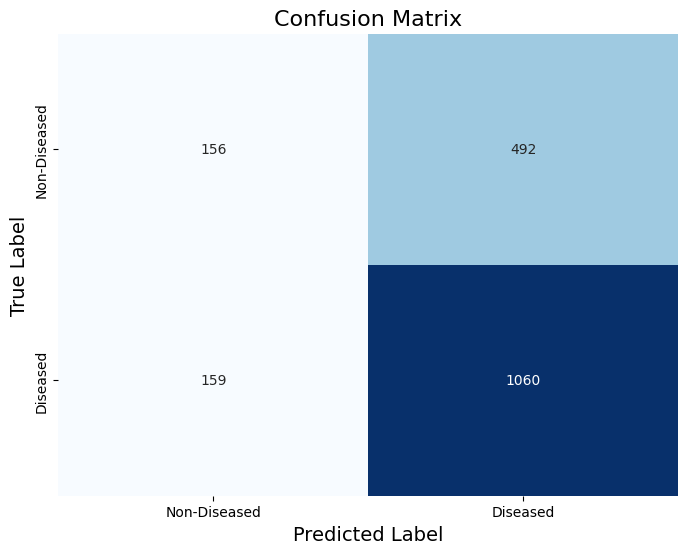

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Non-Diseased', 'Diseased']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()


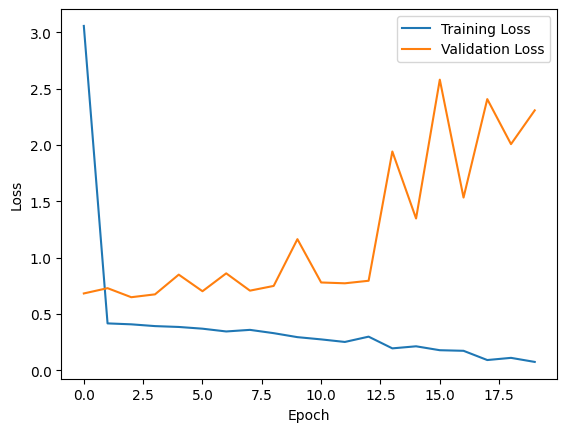

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


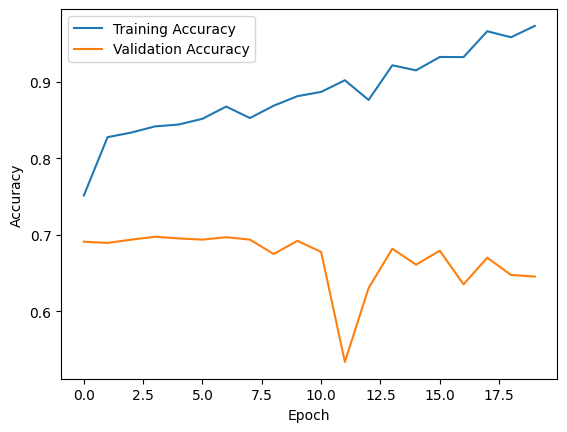

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


In [ ]:
print(type(X_test))
X_test = np.array(X_test)
# X_test = X_test / 2

<class 'list'>


In [ ]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('Prediction Shape:', y_pred.shape)

81/81 [==============================] - 1s 12ms/step
Prediction Shape: (2586, 2)


GoogLeNet

In [ ]:
from tensorflow.keras import layers, models

def GoogLeNet(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)

    # First Inception module
    tower_1 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(input_layer)
    tower_1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

    tower_2 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(input_layer)
    tower_2 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

    tower_3 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_layer)
    tower_3 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

    x = layers.concatenate([tower_1, tower_2, tower_3], axis=-1)

    # Second Inception module
    tower_1 = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    tower_1 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(tower_1)

    tower_2 = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    tower_2 = layers.Conv2D(128, (5, 5), padding='same', activation='relu')(tower_2)

    tower_3 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    tower_3 = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(tower_3)

    x = layers.concatenate([tower_1, tower_2, tower_3], axis=-1)

    # Average pooling layer
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layers
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=x)
    return model

In [ ]:
input_shape = (128, 128, 3)
num_classes = 2  # Number of classes (Diseased and Non-Diseased)
model = GoogLeNet(input_shape, num_classes)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


In [ ]:
print(type(X_test))
X_test = np.array(X_test)

In [ ]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('Prediction Shape:', y_pred.shape)

InceptionResNetV2

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionResNetV2

def InceptionResNetV2(input_shape):
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model
    base_model.trainable = False

    # Intermediate layer for residual connection
    x = base_model.output

    # Add residual connection
    residual = layers.Conv2D(128, kernel_size=(1, 1), strides=(2, 2), padding='same')(x)
    residual = layers.BatchNormalization()(residual)

    # Add final layers
    x = layers.add([x, residual])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)  # Additional dense layer
    x = layers.Dropout(0.5)(x)  # Additional dropout layer
    output = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=output)

    return model


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2

input_shape = (128, 128, 3)
num_classes = 2  # Number of classes (Diseased and Non-Diseased)
model = InceptionResNetV2(include_top=False, weights="imagenet", input_shape=input_shape)

# Freeze the convolutional layers in the model
for layer in model.layers:
    layer.trainable = False

# Add a global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)

# Add a fully connected layer with softmax activation
predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

# Create the new model
model = tf.keras.Model(inputs=model.input, outputs=predictions)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
if y_train.shape[-1] != num_classes:
    y_train = tf.one_hot(y_train, depth=num_classes)

if y_val.shape[-1] != num_classes:
    y_val = tf.one_hot(y_val, depth=num_classes)

In [ ]:
model.reset_states()
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
42/42 [==============================] - 519s 12s/step - loss: 4.3416 - accuracy: 0.6471 - val_loss: 5.7053 - val_accuracy: 0.6561
Epoch 2/20
42/42 [==============================] - 500s 12s/step - loss: 1.9115 - accuracy: 0.6880 - val_loss: 1.8691 - val_accuracy: 0.6776
Epoch 3/20
42/42 [==============================] - 509s 12s/step - loss: 0.8853 - accuracy: 0.7805 - val_loss: 2.0899 - val_accuracy: 0.6851
Epoch 4/20
42/42 [==============================] - 489s 12s/step - loss: 1.1155 - accuracy: 0.7432 - val_loss: 1.7547 - val_accuracy: 0.6861
Epoch 5/20
42/42 [==============================] - 503s 12s/step - loss: 1.8382 - accuracy: 0.6959 - val_loss: 4.4015 - val_accuracy: 0.6631
Epoch 6/20
42/42 [==============================] - 504s 12s/step - loss: 1.7243 - accuracy: 0.7167 - val_loss: 2.5763 - val_accuracy: 0.6802
Epoch 7/20
42/42 [==============================] - 498s 12s/step - loss: 1.1232 - accuracy: 0.7555 - val_loss: 4.9106 - val_accuracy: 0.6583
Epoch 

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

59/59 [==============================] - 126s 2s/step - loss: 1.3856 - accuracy: 0.6583
Validation Loss: 1.3855737447738647
Validation Accuracy: 0.658275306224823


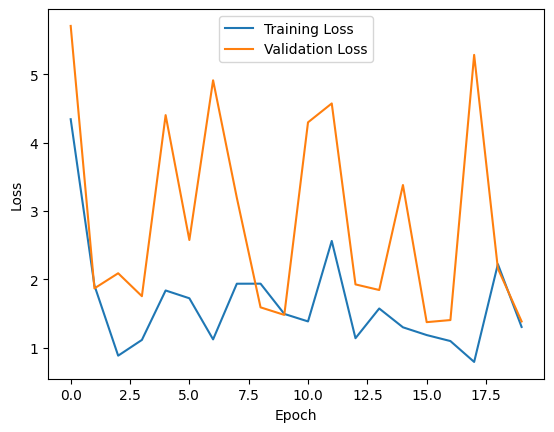

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

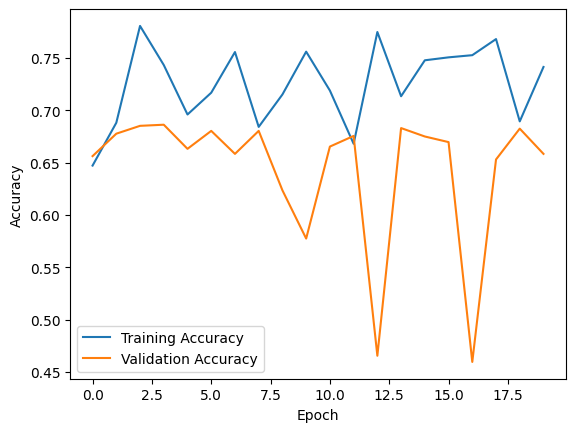

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


ResNet50

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import glob as gb

import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define input shape
input_shape = (128, 128, 3)

# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
42/42 [==============================] - 12s 204ms/step - loss: 2.1625 - accuracy: 0.7039 - val_loss: 1.6467 - val_accuracy: 0.6593
Epoch 2/20
42/42 [==============================] - 6s 147ms/step - loss: 0.5532 - accuracy: 0.7863 - val_loss: 0.9434 - val_accuracy: 0.6647
Epoch 3/20
42/42 [==============================] - 8s 181ms/step - loss: 0.4368 - accuracy: 0.8218 - val_loss: 0.7571 - val_accuracy: 0.6663
Epoch 4/20
42/42 [==============================] - 6s 149ms/step - loss: 0.4008 - accuracy: 0.8371 - val_loss: 0.7329 - val_accuracy: 0.6583
Epoch 5/20
42/42 [==============================] - 6s 152ms/step - loss: 0.3815 - accuracy: 0.8441 - val_loss: 0.8050 - val_accuracy: 0.6593
Epoch 6/20
42/42 [==============================] - 6s 152ms/step - loss: 0.3906 - accuracy: 0.8435 - val_loss: 0.8706 - val_accuracy: 0.6706
Epoch 7/20
42/42 [==============================] - 7s 175ms/step - loss: 0.3796 - accuracy: 0.8452 - val_loss: 0.7771 - val_accuracy: 0.6610
Epoch

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)


59/59 [==============================] - 2s 39ms/step - loss: 0.9530 - accuracy: 0.6679
Validation Loss: 0.9530432820320129
Validation Accuracy: 0.6679164171218872


59/59 [==============================] - 4s 35ms/step


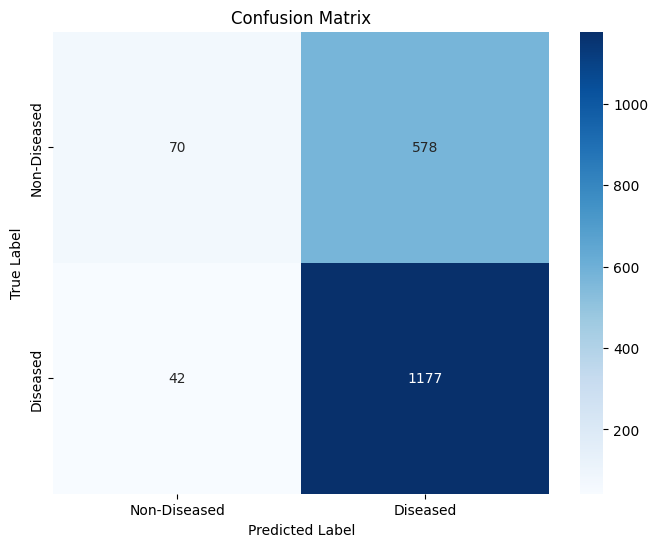

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Non-Diseased', 'Diseased']

# Making predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar = False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


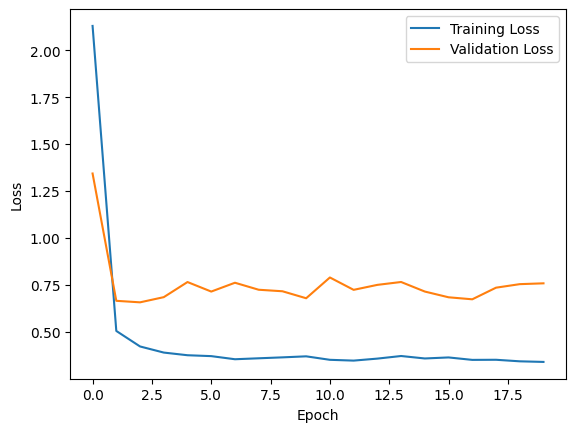

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

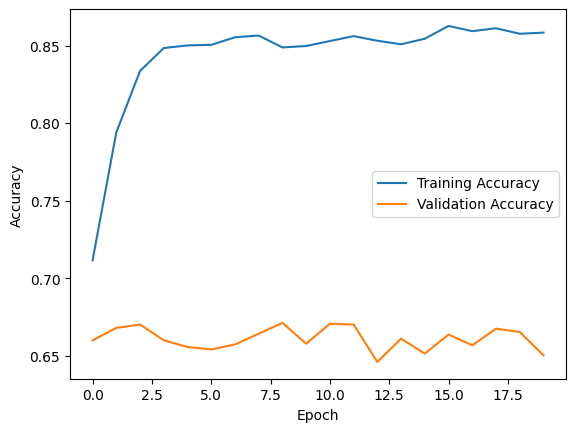

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


In [ ]:
print(type(X_test))
X_test = np.array(X_test)

<class 'list'>


In [ ]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('Prediction Shape:', y_pred.shape)

81/81 [==============================] - 5s 46ms/step
Prediction Shape: (2586, 1)


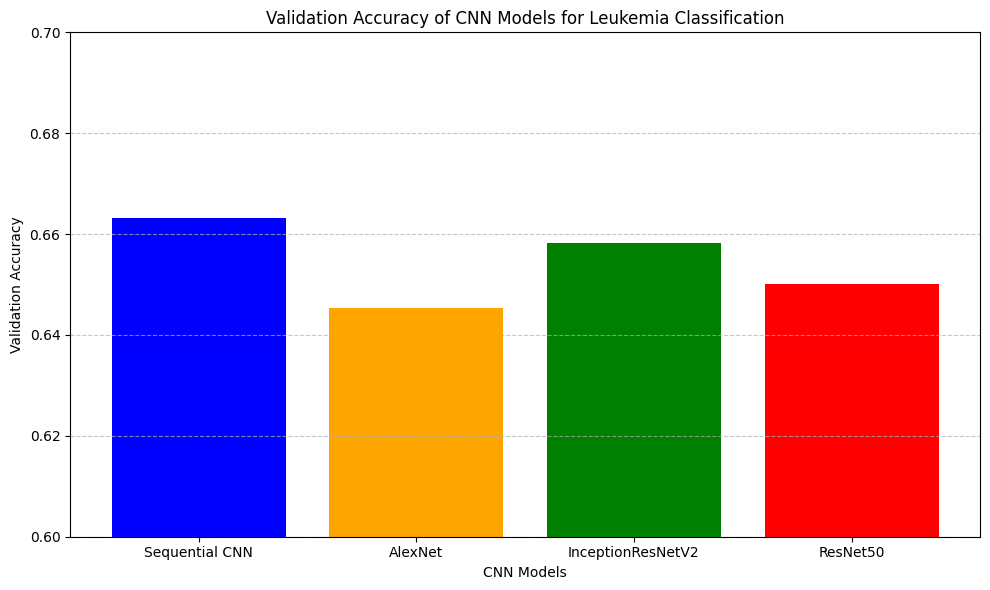

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Sequential CNN', 'AlexNet', 'InceptionResNetV2', 'ResNet50', 'VGG19', 'ResNet101']
accuracies = [0.6631, 0.6454, 0.6583, 0.6502, 0.6824, 0.6765]
colors = ['blue', 'orange', 'green', 'red', 'violet', 'brown']

# Plot
plt.figure(figsize=(10, 6))
for model, accuracy, color in zip(models, accuracies, colors):
    plt.plot(model, accuracy, marker='o', linestyle='-', color=color, label=model)
plt.xlabel('CNN Models')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy of CNN Models for Leukemia Classification')
plt.ylim(0.6, 0.7)  # Setting y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


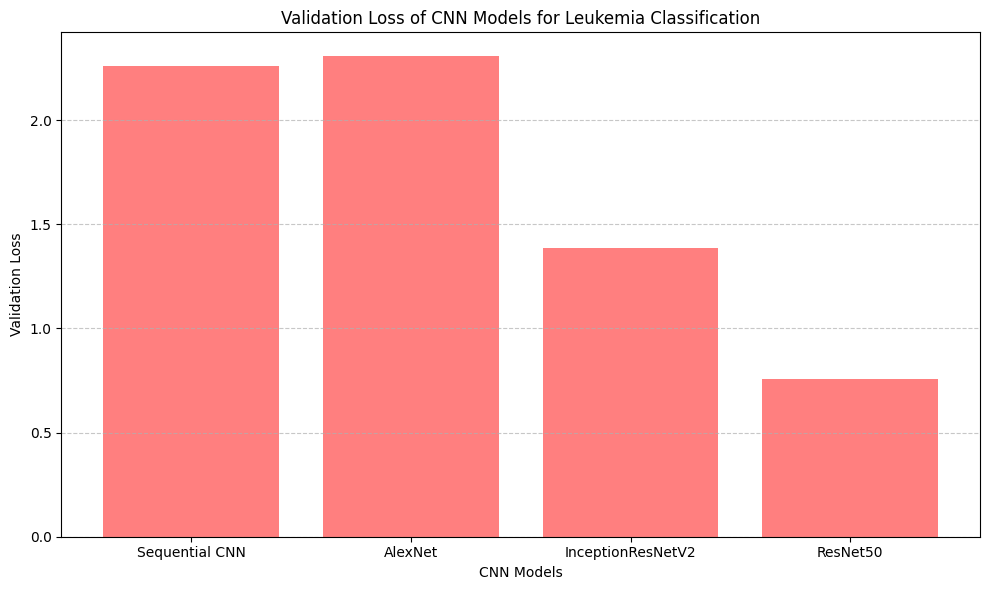

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Sequential CNN', 'AlexNet', 'InceptionResNetV2', 'ResNet50', 'VGG19', 'ResNet101']
losses = [2.2624, 2.3068, 1.3856, 0.7594, 0.7695, 0.7437]
colors = ['blue', 'orange', 'green', 'red', 'violet', 'brown']

# Plot
plt.figure(figsize=(10, 6))
for model, loss, color in zip(models, losses, colors):
    plt.plot(model, loss, marker='o', linestyle='-', color=color, label=model)
plt.xlabel('CNN Models')
plt.ylabel('Validation Loss')
plt.title('Validation Loss of CNN Models for Leukemia Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


Models to do - UNET, Resnet108, vgg19

ResNet101

In [ ]:
from tensorflow.keras.applications import ResNet101

def ResNet101(input_shape, num_classes):
    # base_model = ResNet101(weights='imagenet', include_top=False, input_shape=input_shape)
    # base_model = ResNet101(include_top=False, input_shape=input_shape)
    base_model = ResNet101(input_shape=input_shape,num_classes=num_classes)

    # Freeze the base model
    base_model.trainable = False

    # Intermediate layer for residual connection
    x = base_model.output

    # Add residual connection
    residual = layers.Conv2D(128, kernel_size=(1, 1), strides=(2, 2), padding='same')(x)
    residual = layers.BatchNormalization()(residual)

    # Add final layers
    x = layers.add([x, residual])
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)  # Additional dense layer
    x = layers.Dropout(0.5)(x)  # Additional dropout layer
    output = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=output)

    return model


In [ ]:
input_shape = (128, 128, 3)
num_classes = 2  # Number of classes (Diseased and Non-Diseased)
model = ResNet101(input_shape, num_classes)

RecursionError: maximum recursion depth exceeded

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


In [ ]:
print(type(X_test))
X_test = np.array(X_test)
# X_test = X_test / 2

In [ ]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('Prediction Shape:', y_pred.shape)

U-NET

In [ ]:
from tensorflow.keras import layers, models

def conv_block(input_tensor, num_filters):
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    return encoder

def UNet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    encoder1 = conv_block(inputs, 64)
    encoder_pool1 = layers.MaxPooling2D((2, 2))(encoder1)

    encoder2 = conv_block(encoder_pool1, 128)
    encoder_pool2 = layers.MaxPooling2D((2, 2))(encoder2)

    encoder3 = conv_block(encoder_pool2, 256)
    encoder_pool3 = layers.MaxPooling2D((2, 2))(encoder3)

    encoder4 = conv_block(encoder_pool3, 512)
    encoder_pool4 = layers.MaxPooling2D((2, 2))(encoder4)

    center = conv_block(encoder_pool4, 1024)

    # Decoder
    decoder4 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(center)
    decoder4 = layers.concatenate([decoder4, encoder4], axis=-1)
    decoder4 = conv_block(decoder4, 512)

    decoder3 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(decoder4)
    decoder3 = layers.concatenate([decoder3, encoder3], axis=-1)
    decoder3 = conv_block(decoder3, 256)

    decoder2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(decoder3)
    decoder2 = layers.concatenate([decoder2, encoder2], axis=-1)
    decoder2 = conv_block(decoder2, 128)

    decoder1 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(decoder2)
    decoder1 = layers.concatenate([decoder1, encoder1], axis=-1)
    decoder1 = conv_block(decoder1, 64)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(decoder1)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model


In [ ]:
input_shape = (128, 128, 3)
num_classes = 2  # Number of classes (Diseased and Non-Diseased)
model = UNet(input_shape, num_classes)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val.reshape(-1, 2)))

ValueError: cannot reshape array of size 1867 into shape (2)

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


In [ ]:
print(type(X_test))
X_test = np.array(X_test)
# X_test = X_test / 2

In [ ]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('Prediction Shape:', y_pred.shape)

VGG19

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam

In [ ]:
input_shape = (128, 128, 3)

base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
42/42 [==============================] - 34s 587ms/step - loss: 1.0831 - accuracy: 0.7281 - val_loss: 0.6775 - val_accuracy: 0.6717
Epoch 2/20
42/42 [==============================] - 13s 303ms/step - loss: 0.4280 - accuracy: 0.8289 - val_loss: 0.6484 - val_accuracy: 0.6872
Epoch 3/20
42/42 [==============================] - 13s 302ms/step - loss: 0.4054 - accuracy: 0.8353 - val_loss: 0.6481 - val_accuracy: 0.6824
Epoch 4/20
42/42 [==============================] - 10s 241ms/step - loss: 0.3971 - accuracy: 0.8439 - val_loss: 0.6694 - val_accuracy: 0.6749
Epoch 5/20
42/42 [==============================] - 13s 303ms/step - loss: 0.3823 - accuracy: 0.8475 - val_loss: 0.6978 - val_accuracy: 0.6813
Epoch 6/20
42/42 [==============================] - 10s 241ms/step - loss: 0.3726 - accuracy: 0.8550 - val_loss: 0.6970 - val_accuracy: 0.6813
Epoch 7/20
42/42 [==============================] - 13s 305ms/step - loss: 0.3685 - accuracy: 0.8550 - val_loss: 0.6664 - val_accuracy: 0.6792

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

59/59 [==============================] - 7s 73ms/step - loss: 0.8237 - accuracy: 0.6760
Validation Loss: 0.8236826062202454
Validation Accuracy: 0.6759507060050964


59/59 [==============================] - 4s 65ms/step


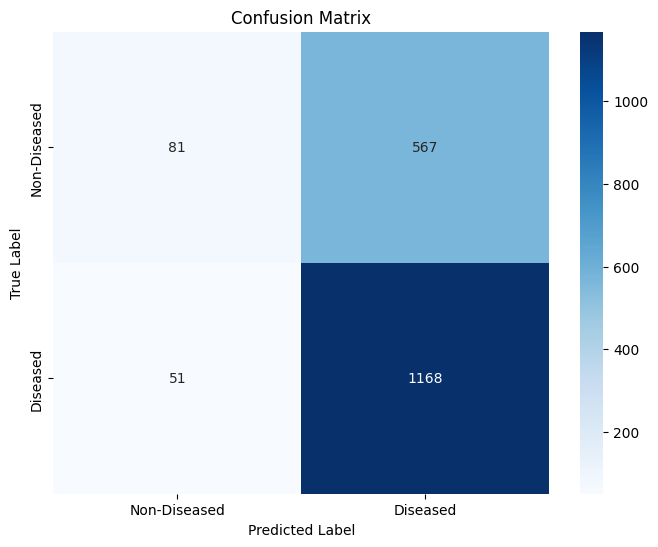

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Non-Diseased', 'Diseased']

# Making predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


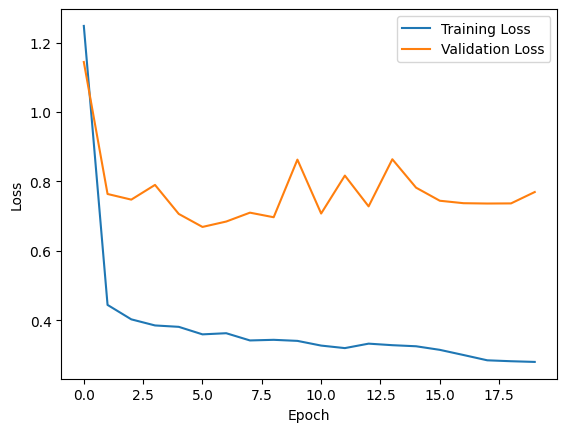

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

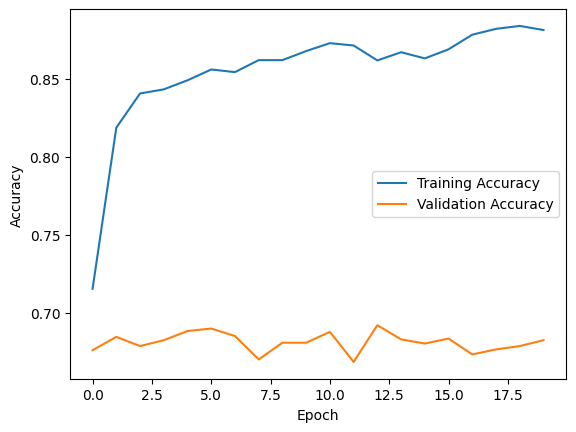

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


In [ ]:
print(type(X_test))
X_test = np.array(X_test)
# X_test = X_test / 2

<class 'list'>


In [ ]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('Prediction Shape:', y_pred.shape)

81/81 [==============================] - 6s 78ms/step
Prediction Shape: (2586, 1)


ResNet 101


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam

In [ ]:
input_shape = (128, 128, 3)

# Load ResNet101 model
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=input_shape)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)


In [ ]:
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
42/42 [==============================] - 22s 310ms/step - loss: 2.2194 - accuracy: 0.7193 - val_loss: 1.0270 - val_accuracy: 0.6722
Epoch 2/20
42/42 [==============================] - 11s 256ms/step - loss: 0.4527 - accuracy: 0.8174 - val_loss: 0.7297 - val_accuracy: 0.6668
Epoch 3/20
42/42 [==============================] - 11s 258ms/step - loss: 0.4311 - accuracy: 0.8366 - val_loss: 0.7037 - val_accuracy: 0.6679
Epoch 4/20
42/42 [==============================] - 13s 315ms/step - loss: 0.4010 - accuracy: 0.8426 - val_loss: 0.6849 - val_accuracy: 0.6481
Epoch 5/20
42/42 [==============================] - 11s 257ms/step - loss: 0.3827 - accuracy: 0.8518 - val_loss: 0.7129 - val_accuracy: 0.6658
Epoch 6/20
42/42 [==============================] - 13s 316ms/step - loss: 0.3729 - accuracy: 0.8486 - val_loss: 0.6515 - val_accuracy: 0.6685
Epoch 7/20
42/42 [==============================] - 13s 322ms/step - loss: 0.3595 - accuracy: 0.8589 - val_loss: 0.6882 - val_accuracy: 0.6529

59/59 [==============================] - 3s 52ms/step


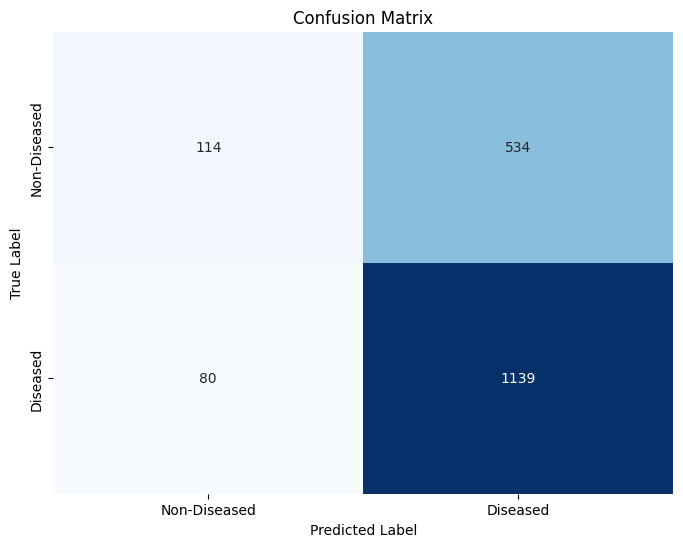

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Non-Diseased', 'Diseased']

# Making predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar = False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


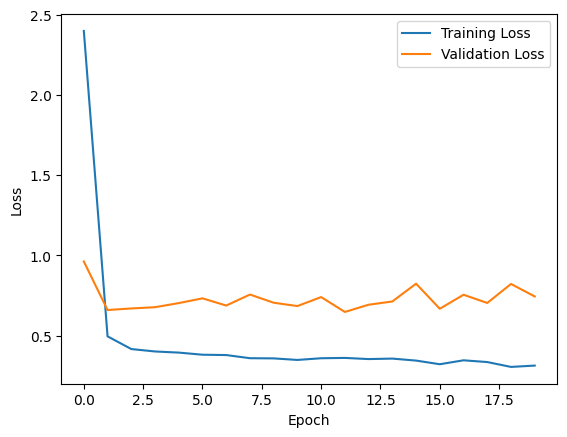

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

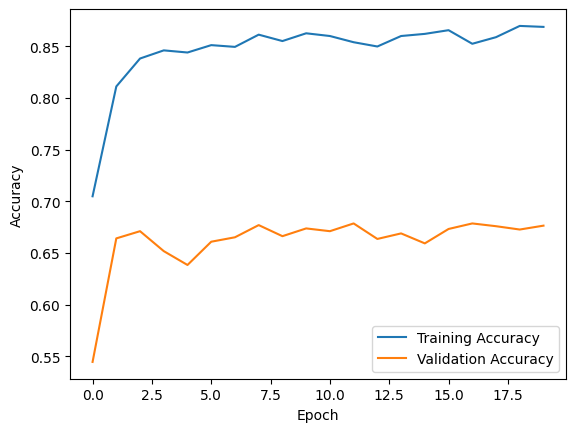

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

59/59 [==============================] - 6s 74ms/step - loss: 0.7437 - accuracy: 0.6765
Validation Loss: 0.7437492609024048
Validation Accuracy: 0.6764863133430481


In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


In [ ]:
print(type(X_test))
X_test = np.array(X_test)
# X_test = X_test / 2

<class 'list'>


In [ ]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('Prediction Shape:', y_pred.shape)

81/81 [==============================] - 34s 67ms/step
Prediction Shape: (2586, 1)


Squeezenet

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Dropout, GlobalAveragePooling2D

def fire_module(x, squeeze_filters, expand_filters):
    squeeze = Conv2D(filters=squeeze_filters, kernel_size=(1, 1), activation='relu', padding='same')(x)
    expand_1x1 = Conv2D(filters=expand_filters, kernel_size=(1, 1), activation='relu', padding='same')(squeeze)
    expand_3x3 = Conv2D(filters=expand_filters, kernel_size=(3, 3), activation='relu', padding='same')(squeeze)
    output = concatenate([expand_1x1, expand_3x3], axis=-1)
    return output

def SqueezeNet(input_shape=(224, 224, 3), classes=1000):
    input_layer = Input(shape=input_shape)

    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=16, expand_filters=64)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = fire_module(x, squeeze_filters=32, expand_filters=128)

    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)

    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = fire_module(x, squeeze_filters=64, expand_filters=256)

    x = Dropout(0.5)(x)

    x = Conv2D(classes, kernel_size=(1, 1), activation='relu', padding='valid')(x)
    x = GlobalAveragePooling2D()(x)
    output = tf.keras.layers.Activation('softmax')(x)

    model = Model(inputs=input_layer, outputs=output, name='squeezenet')

    return model

# # Create SqueezeNet model
model = SqueezeNet()

# Display model summary
model.summary()


Model: "squeezenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 224, 224, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 64)         0         ['conv2d_26[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_27 (Conv2D)          (None, 112, 112, 16)         1040      ['max_pooling2d_3[0][

In [ ]:
# from squeezenet import SqueezeNet

model = SqueezeNet(input_shape=(128, 128, 3), classes=1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define early stopping callback
earlystop = EarlyStopping(patience=15)

# Define learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val),
                    verbose=2, steps_per_epoch=X_train.shape[0] // 128, callbacks=[earlystop, learning_rate_reduction])


Epoch 1/20
41/41 - 635s - loss: 0.6044 - accuracy: 0.6825 - val_loss: 0.6957 - val_accuracy: 0.6529 - lr: 0.0010 - 635s/epoch - 15s/step
Epoch 2/20
41/41 - 613s - loss: 0.5660 - accuracy: 0.6805 - val_loss: 0.6871 - val_accuracy: 0.6529 - lr: 0.0010 - 613s/epoch - 15s/step
Epoch 3/20

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
41/41 - 628s - loss: 0.5151 - accuracy: 0.6849 - val_loss: 0.7009 - val_accuracy: 0.6529 - lr: 0.0010 - 628s/epoch - 15s/step
Epoch 4/20
41/41 - 623s - loss: 0.4893 - accuracy: 0.6807 - val_loss: 0.8550 - val_accuracy: 0.6529 - lr: 5.0000e-04 - 623s/epoch - 15s/step
Epoch 5/20

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
41/41 - 625s - loss: 0.4868 - accuracy: 0.6822 - val_loss: 0.7646 - val_accuracy: 0.6529 - lr: 5.0000e-04 - 625s/epoch - 15s/step
Epoch 6/20
41/41 - 621s - loss: 0.4752 - accuracy: 0.6794 - val_loss: 0.7039 - val_accuracy: 0.6529 - lr: 2.5000e-04 - 621s/epoch - 15s/step
Epoch 7/20



In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

59/59 [==============================] - 50s 834ms/step - loss: 0.7440 - accuracy: 0.6529
Validation Loss: 0.7439862489700317
Validation Accuracy: 0.6529191136360168


59/59 [==============================] - 55s 918ms/step


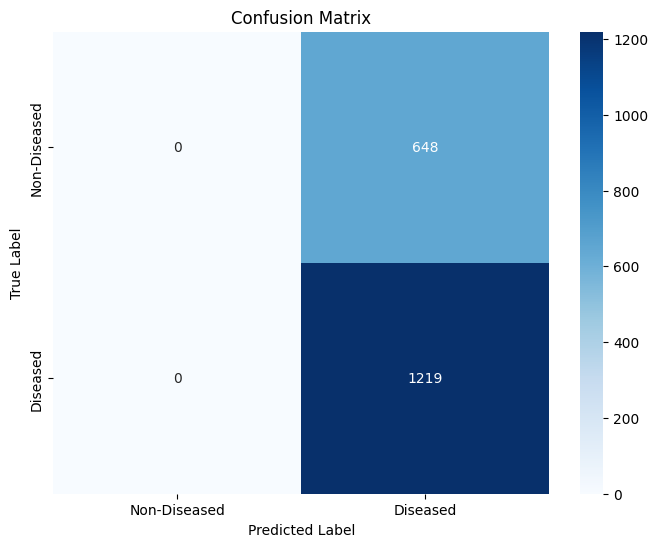

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Non-Diseased', 'Diseased']

# Making predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


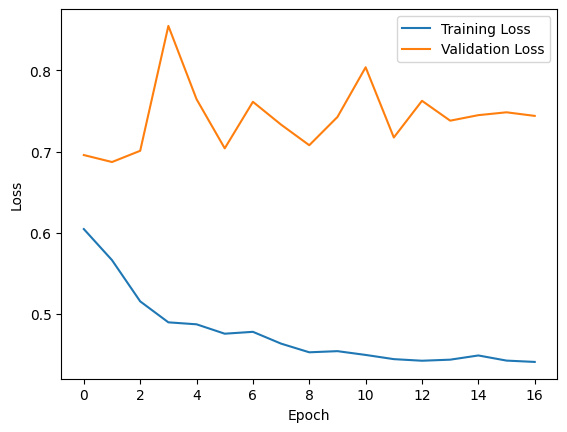

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

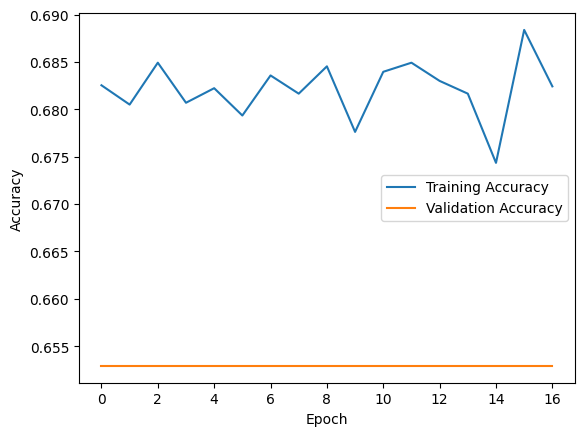

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


In [ ]:
print(type(X_test))
X_test = np.array(X_test)
# X_test = X_test / 2

<class 'list'>


In [ ]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('Prediction Shape:', y_pred.shape)

81/81 [==============================] - 69s 841ms/step
Prediction Shape: (2586, 1)


VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

59/59 [==============================] - 9s 61ms/step - loss: 0.8619 - accuracy: 0.6283
Validation Loss: 0.8618927001953125
Validation Accuracy: 0.6282806396484375


59/59 [==============================] - 2s 36ms/step


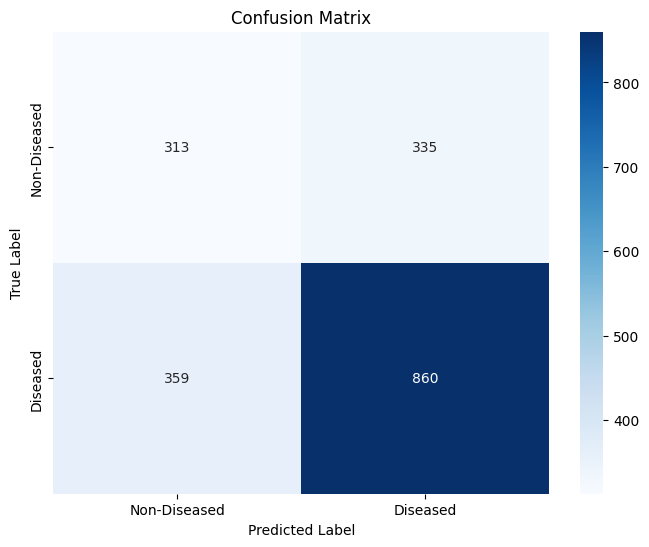

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Non-Diseased', 'Diseased']

# Making predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=15)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val),
                    verbose=2, steps_per_epoch=X_train.shape[0] // 128, callbacks=[earlystop, learning_rate_reduction])


Epoch 1/20
41/41 - 25s - loss: 1.2427 - accuracy: 0.7872 - val_loss: 0.8334 - val_accuracy: 0.6990 - lr: 0.0010 - 25s/epoch - 615ms/step
Epoch 2/20
41/41 - 13s - loss: 0.3436 - accuracy: 0.8570 - val_loss: 0.9554 - val_accuracy: 0.6792 - lr: 0.0010 - 13s/epoch - 326ms/step
Epoch 3/20

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
41/41 - 8s - loss: 0.3335 - accuracy: 0.8637 - val_loss: 0.8688 - val_accuracy: 0.6792 - lr: 0.0010 - 8s/epoch - 199ms/step
Epoch 4/20
41/41 - 8s - loss: 0.2868 - accuracy: 0.8785 - val_loss: 0.7641 - val_accuracy: 0.6867 - lr: 5.0000e-04 - 8s/epoch - 201ms/step
Epoch 5/20

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
41/41 - 8s - loss: 0.2682 - accuracy: 0.8902 - val_loss: 0.7685 - val_accuracy: 0.6797 - lr: 5.0000e-04 - 8s/epoch - 189ms/step
Epoch 6/20
41/41 - 8s - loss: 0.2566 - accuracy: 0.8989 - val_loss: 0.8988 - val_accuracy: 0.6776 - lr: 2.5000e-04 - 8s/epoch - 203ms/step
Epoch 7/20

Epoch 7:

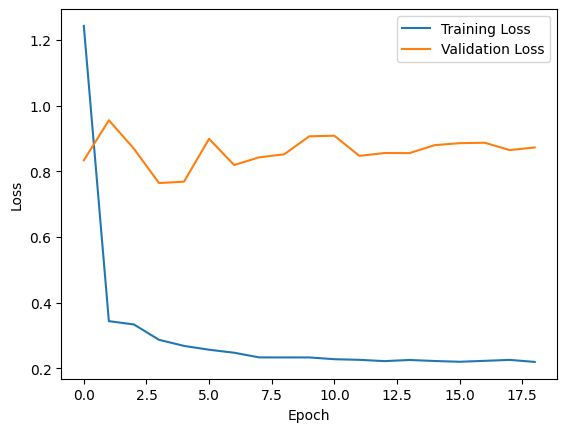

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

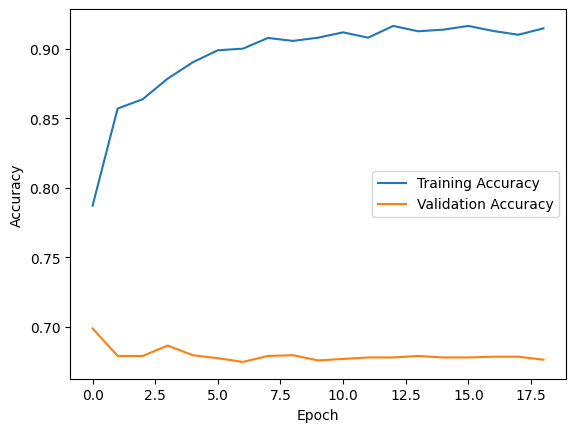

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
testPath=r"/content/drive/MyDrive/C-NMC_Leukemia/testing_data"

In [ ]:
X_test = []

for folder in  os.listdir(testPath) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.bmp'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (128,128))
        X_test.append(list(image_array))


NameError: name 'os' is not defined

In [ ]:
print(type(X_test))
X_test = np.array(X_test)
# X_test = X_test / 2

In [ ]:
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('Prediction Shape:', y_pred.shape)

MobileNetV2

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import glob as gb

import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define input shape
input_shape = (128, 128, 3)

# Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
42/42 [==============================] - 15s 146ms/step - loss: 0.7395 - accuracy: 0.7632 - val_loss: 0.7536 - val_accuracy: 0.6749
Epoch 2/20
42/42 [==============================] - 3s 62ms/step - loss: 0.4431 - accuracy: 0.8218 - val_loss: 0.7135 - val_accuracy: 0.6883
Epoch 3/20
42/42 [==============================] - 3s 77ms/step - loss: 0.4238 - accuracy: 0.8246 - val_loss: 0.6307 - val_accuracy: 0.6818
Epoch 4/20
42/42 [==============================] - 3s 78ms/step - loss: 0.4173 - accuracy: 0.8263 - val_loss: 0.6894 - val_accuracy: 0.6840
Epoch 5/20
42/42 [==============================] - 3s 82ms/step - loss: 0.4083 - accuracy: 0.8248 - val_loss: 0.6748 - val_accuracy: 0.6840
Epoch 6/20
42/42 [==============================] - 3s 62ms/step - loss: 0.4104 - accuracy: 0.8326 - val_loss: 0.6644 - val_accuracy: 0.6867
Epoch 7/20
42/42 [==============================] - 3s 78ms/step - loss: 0.3954 - accuracy: 0.8385 - val_loss: 0.6307 - val_accuracy: 0.6909
Epoch 8/20


In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)


59/59 [==============================] - 2s 24ms/step - loss: 0.7468 - accuracy: 0.6808
Validation Loss: 0.7467726469039917
Validation Accuracy: 0.6807712912559509


In [ ]:
y_pred = model.predict(X_val)
print('Prediction Shape:', y_pred.shape)


59/59 [==============================] - 4s 17ms/step
Prediction Shape: (1867, 1)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)

report = classification_report(y_val, y_pred_classes)
print(report)


59/59 [==============================] - 1s 18ms/step
              precision    recall  f1-score   support

           0       0.60      0.24      0.34       648
           1       0.69      0.91      0.79      1219

    accuracy                           0.68      1867
   macro avg       0.65      0.58      0.57      1867
weighted avg       0.66      0.68      0.63      1867



59/59 [==============================] - 1s 18ms/step


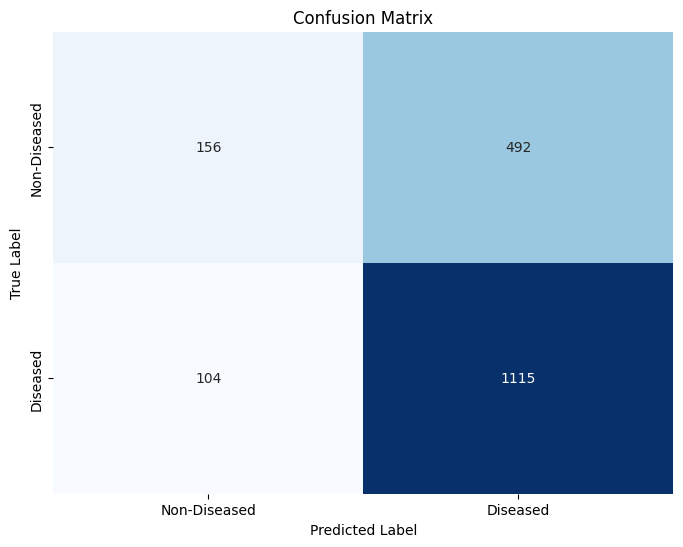

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Non-Diseased', 'Diseased']

# Making predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar = False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


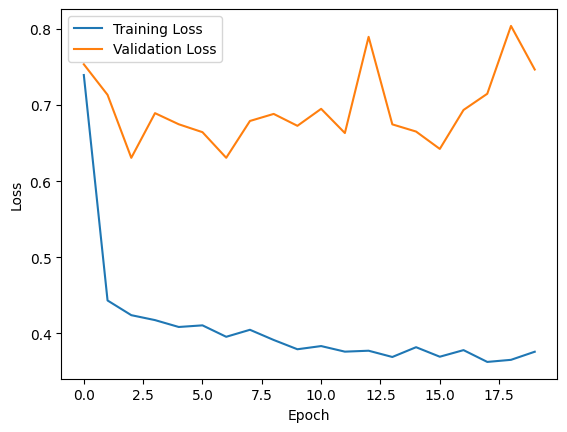

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

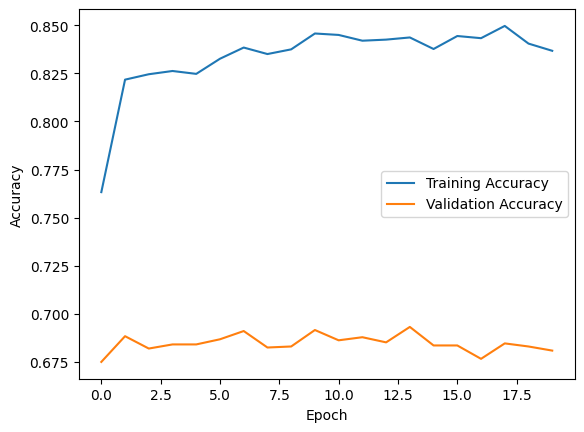

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

EfficientNetB0

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import glob as gb

import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define input shape
input_shape = (128, 128, 3)

# Load EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
42/42 [==============================] - 27s 303ms/step - loss: 0.7295 - accuracy: 0.7439 - val_loss: 0.7870 - val_accuracy: 0.6652
Epoch 2/20
42/42 [==============================] - 4s 106ms/step - loss: 0.4417 - accuracy: 0.8116 - val_loss: 0.6831 - val_accuracy: 0.6513
Epoch 3/20
42/42 [==============================] - 4s 102ms/step - loss: 0.4156 - accuracy: 0.8319 - val_loss: 0.6921 - val_accuracy: 0.6401
Epoch 4/20
42/42 [==============================] - 5s 112ms/step - loss: 0.4143 - accuracy: 0.8362 - val_loss: 0.7007 - val_accuracy: 0.6304
Epoch 5/20
42/42 [==============================] - 5s 109ms/step - loss: 0.3974 - accuracy: 0.8371 - val_loss: 0.7160 - val_accuracy: 0.6572
Epoch 6/20
42/42 [==============================] - 5s 109ms/step - loss: 0.3943 - accuracy: 0.8383 - val_loss: 0.6811 - val_accuracy: 0.6706
Epoch 7/20
42/42 [==============================] - 4s 107ms/step - loss: 0.3871 - accuracy: 0.8411 - val_loss: 0.7903 - val_accuracy: 0.6765
Epoch

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)


59/59 [==============================] - 3s 33ms/step - loss: 0.7117 - accuracy: 0.6599
Validation Loss: 0.7116939425468445
Validation Accuracy: 0.6598821878433228


In [ ]:
y_pred = model.predict(X_val)
print('Prediction Shape:', y_pred.shape)


59/59 [==============================] - 3s 22ms/step
Prediction Shape: (1867, 1)


In [ ]:
# prompt: classification report for the above model

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)

report = classification_report(y_val, y_pred_classes)
print(report)


59/59 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

           0       0.52      0.21      0.30       648
           1       0.68      0.90      0.77      1219

    accuracy                           0.66      1867
   macro avg       0.60      0.56      0.54      1867
weighted avg       0.63      0.66      0.61      1867



59/59 [==============================] - 1s 20ms/step


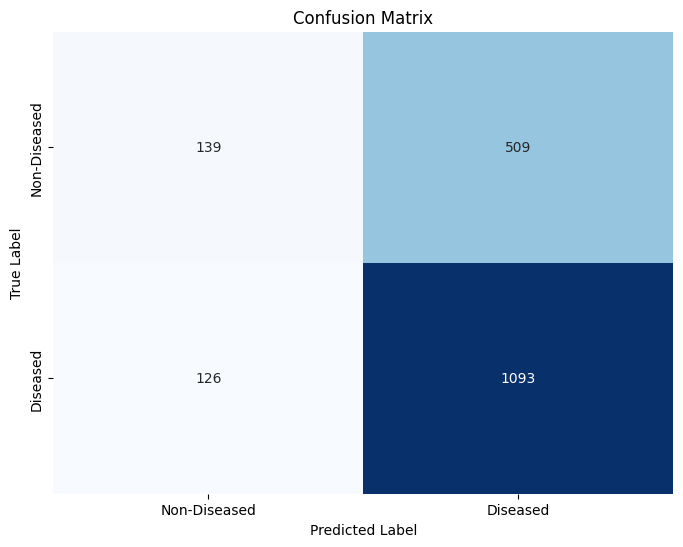

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Non-Diseased', 'Diseased']

# Making predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar = False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


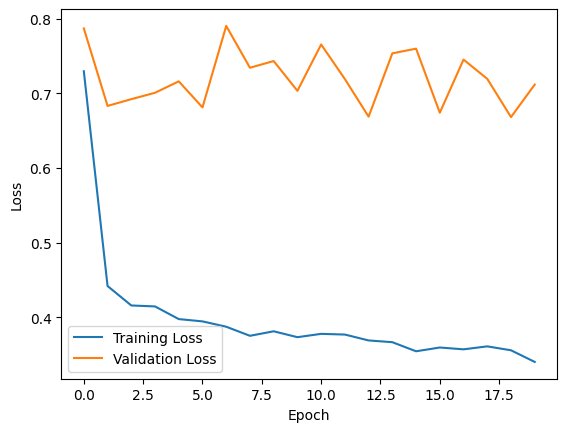

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

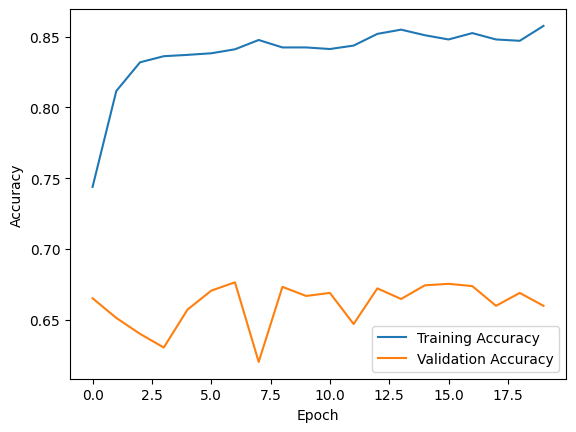

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

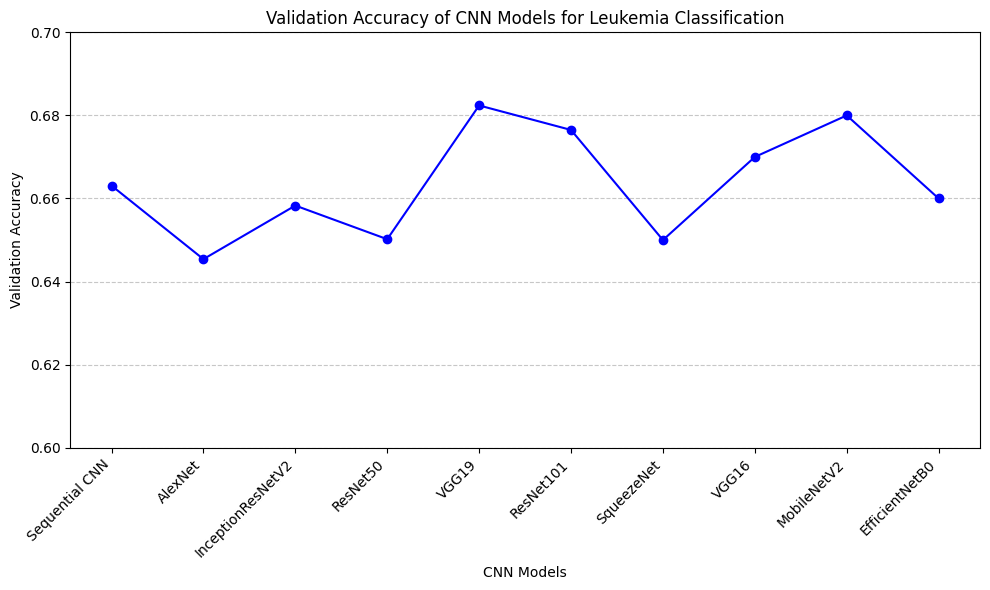

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Sequential CNN', 'AlexNet', 'InceptionResNetV2', 'ResNet50', 'VGG19', 'ResNet101', 'SqueezeNet', 'VGG16', 'MobileNetV2', 'EfficientNetB0']
accuracies = [0.6631, 0.6454, 0.6583, 0.6502, 0.6824, 0.6765, 0.65, 0.67, 0.68, 0.66]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('CNN Models')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy of CNN Models for Leukemia Classification')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.6, 0.7)  # Setting y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


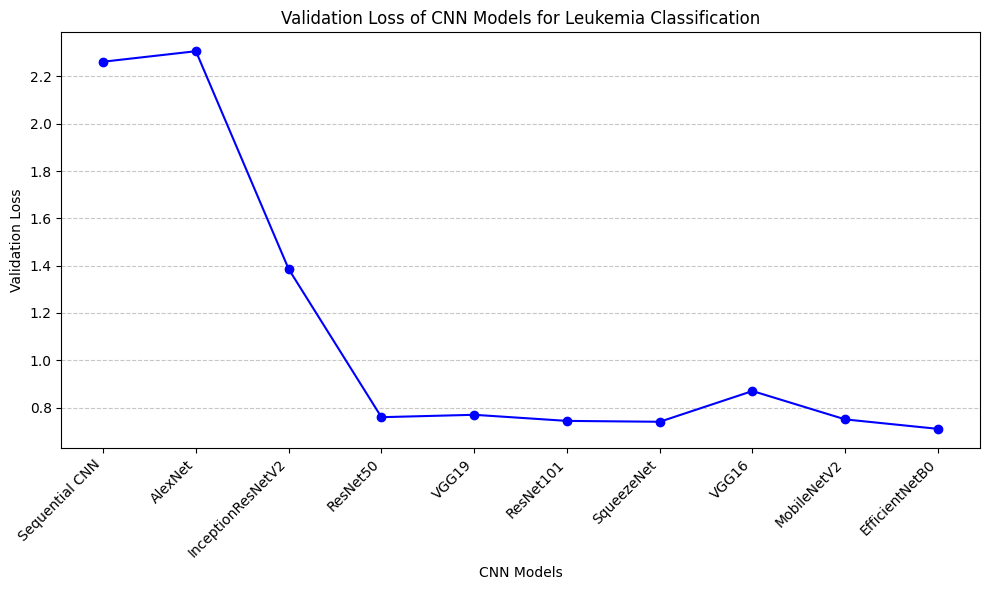

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Sequential CNN', 'AlexNet', 'InceptionResNetV2', 'ResNet50', 'VGG19', 'ResNet101', 'SqueezeNet', 'VGG16', 'MobileNetV2', 'EfficientNetB0']
losses = [2.2624, 2.3068, 1.3856, 0.7594, 0.7695, 0.7437, 0.74, 0.87, 0.75, 0.71]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(models, losses, marker='o', linestyle='-', color='b')
plt.xlabel('CNN Models')
plt.ylabel('Validation Loss')
plt.title('Validation Loss of CNN Models for Leukemia Classification')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()
